<a href="https://colab.research.google.com/github/allenalvin333/College7/blob/master/T1/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Allen Ben Philipose** - 18BIS0043
# **Lab Task - 1, Submitted to: Dr. Sankar Ganesh S**

## Example

In [ ]:
dataset = pd.read_csv('sample_data.csv')
print(dataset)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Nigeria  18.0  15000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11  Nigeria  50.0  60000.0       Yes
12   France  22.0  30000.0        No
13      NaN  44.0  45000.0       Yes
14   France  47.0  78000.0       NaN
15  Nigeria  35.0  43000.0       Yes
16    Spain  34.0  44000.0       Yes
17    Spain  27.0  48000.0       Yes
18    Spain  33.0  48000.0       Yes
19  Nigeria  29.0  77000.0       Yes
20    Spain   NaN  57000.0       Yes
21   France  44.0  48000.0       Yes
22  Germany  50.0  83000.0        No
23   France  37.0  67000.0       Yes
24   France  37.0  23000.0       Yes
25  Germany  45.0  50000.0        No
2

In [ ]:
dataset = dataset.drop_duplicates()
print(dataset)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Nigeria  18.0  15000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11  Nigeria  50.0  60000.0       Yes
12   France  22.0  30000.0        No
13      NaN  44.0  45000.0       Yes
14   France  47.0  78000.0       NaN
15  Nigeria  35.0  43000.0       Yes
16    Spain  34.0  44000.0       Yes
18    Spain  33.0  48000.0       Yes
19  Nigeria  29.0  77000.0       Yes
20    Spain   NaN  57000.0       Yes
21   France  44.0  48000.0       Yes
24   France  37.0  23000.0       Yes
25  Germany  45.0  50000.0        No
27  Nigeria  30.0  30000.0       Yes
28  Nigeria  29.0  15000.0        No


# **0. Initialization**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [84]:
!cp -r /content/gdrive/MyDrive/Academic/Labs/ML/T1 /content/

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
#1
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

#3
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# **1. Dealing with Missing Values** 

## References
- https://www.kaggle.com/dansbecker/handling-missing-values
- https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93
- https://medium.com/x8-the-ai-community/handling-missing-values-in-data-54e1dc77e24f

## Dataset
- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home?select=melb_data.csv

## Explanation
*A common occurrence in a data-set is missing values. This can happen due to multiple reasons like unrecorded observations or data corruption. Pandas library provides a variety of functions for marking these corrupt values. We will study how we can remove or impute these values. There are many ways data can end up with missing values.*
- *A 2 bedroom house wouldn't include an answer for How large is the third bedroom*
- *Someone being surveyed may choose not to share their income*

*Python libraries represent missing numbers as nan which is short for "not a number". Most libraries (including scikit-learn) will give you an error if you try to build a model using data with missing values.*
- *A Simple Option: **Drop Columns with Missing Values** - 
In many cases, you'll have both a training dataset and a test dataset. You will want to drop the same columns in both DataFrames*
- *A Better Option: **Imputation** - Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely. The default behavior fills in the mean value for imputation. Statisticians have researched more complex strategies, but those complex strategies typically give no benefit once you plug the results into sophisticated machine learning models.*

## **Sample Program**

#### Dataset Inspection

In [41]:
df1 = pd.read_csv('/content/T1/2.csv')

In [42]:
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [43]:
df1.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [44]:
df1.info

<bound method DataFrame.info of               Suburb  ... Propertycount
0         Abbotsford  ...        4019.0
1         Abbotsford  ...        4019.0
2         Abbotsford  ...        4019.0
3         Abbotsford  ...        4019.0
4         Abbotsford  ...        4019.0
...              ...  ...           ...
13575  Wheelers Hill  ...        7392.0
13576   Williamstown  ...        6380.0
13577   Williamstown  ...        6380.0
13578   Williamstown  ...        6380.0
13579     Yarraville  ...        6543.0

[13580 rows x 21 columns]>

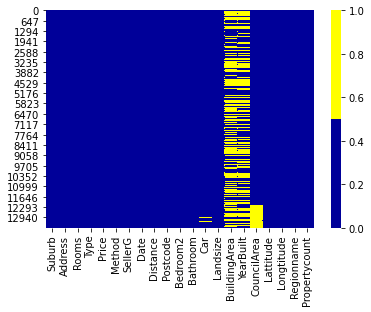

In [81]:
col1 = df1.columns[:30]
colours1 = ['#000099', '#ffff00']
sns.heatmap(df1[col1].isnull(), cmap=sns.color_palette(colours1))

*Yellow represents the missing data in the first 30 entries of the dataframe*

#### **Drop Columns**
*If those columns had useful information (in the places that were not missing), your model loses access to this information when the column is dropped. Also, if your test data has missing values in places where your training data did not, this will result in an error.*

In [45]:
df11 = df1.dropna(axis=1)

In [46]:
df11.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [47]:
df11.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,558.416127,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,3990.669241,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,440.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,433014.000000,-37.408530,145.526350,21650.000000


In [48]:
df1_cols = [col for col in df1.columns 
            if df1[col].isnull().any()]

In [49]:
print(df1_cols)

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']


In [50]:
df12 = df1.drop(df1_cols, axis=1)

In [51]:
df12.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [52]:
df12.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,558.416127,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,3990.669241,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,440.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,433014.000000,-37.408530,145.526350,21650.000000


*So, it's somewhat usually not the best solution. However, it can be useful when most values in a column are missing.*

#### **Imputation**
*Imputation is the standard approach, and it usually works well. However, imputed values may by systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way.*

In [53]:
df13 = df1.select_dtypes(exclude=['object'])

In [54]:
im1 = SimpleImputer()
df14 = im1.fit_transform(df13)

In [55]:
print(df14)

[[ 2.0000000e+00  1.4800000e+06  2.5000000e+00 ... -3.7799600e+01
   1.4499840e+02  4.0190000e+03]
 [ 2.0000000e+00  1.0350000e+06  2.5000000e+00 ... -3.7807900e+01
   1.4499340e+02  4.0190000e+03]
 [ 3.0000000e+00  1.4650000e+06  2.5000000e+00 ... -3.7809300e+01
   1.4499440e+02  4.0190000e+03]
 ...
 [ 3.0000000e+00  1.1700000e+06  6.8000000e+00 ... -3.7852740e+01
   1.4488738e+02  6.3800000e+03]
 [ 4.0000000e+00  2.5000000e+06  6.8000000e+00 ... -3.7859080e+01
   1.4489299e+02  6.3800000e+03]
 [ 4.0000000e+00  1.2850000e+06  6.3000000e+00 ... -3.7811880e+01
   1.4488449e+02  6.5430000e+03]]


#### **Comparitive Study**
*Let's see which method is better for dealing with the missing values in this dataset*

In [56]:
x1 = df1.drop(['Price'], axis=1)               # Predictors
y1 = df1.Price                                 # Target
x1_num = x1.select_dtypes(exclude=['object'])  # Numeric Predictors

In [57]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1_num,y1,train_size=0.7,
                                                    test_size=0.3,random_state=0)

In [58]:
def score_dataset_1(xtrain1, xtest1, ytrain1, ytest1):
    model1 = RandomForestRegressor()
    model1.fit(xtrain1, ytrain1)
    p1 = model1.predict(xtest1)
    return mean_absolute_error(ytest1, p1)

In [59]:
# Dropping Values
df15 = [col for col in xtrain1.columns if xtrain1[col].isnull().any()]
red_xtrain1 = xtrain1.drop(df15, axis=1)
red_xtest1  = xtest1.drop(df15, axis=1)
print("Mean Absolute Error from Dropping columns with Missing Values:")
print(score_dataset_1(red_xtrain1, red_xtest1, ytrain1, ytest1))

Mean Absolute Error from Dropping columns with Missing Values:
181550.618640274


In [60]:
# Imputation
im2 = SimpleImputer()
imp_xtrain1 = im2.fit_transform(xtrain1)
imp_xtest1 = im2.transform(xtest1)
print("Mean Absolute Error from Imputation:")
print(score_dataset_1(imp_xtrain1, imp_xtest1, ytrain1, ytest1))

Mean Absolute Error from Imputation:
172943.8090733338


*Mean Absolute Error from Imputation is lesser. Using this method will help us to improve the model compared to dropping values*

# **2. Handling categorical data**

## References
- https://pbpython.com/categorical-encoding.html
- https://analyticsindiamag.com/complete-guide-to-handling-categorical-data-using-scikit-learn/
- https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6

## Dataset
- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home?select=melb_data.csv

## Explanation

*Categorical features have a lot to say about the dataset thus it should be converted to numerical to make it into a machine-readable format. Focusing only on numerical variables in the dataset isn’t enough to get good accuracy. Often categorical variables prove to be the most important factor and thus identify them. In many practical Data Science activities, the data set will contain categorical variables.*

*These variables are typically stored as text values which represent various traits. Some examples include color (“Red”, “Yellow”, “Blue”), size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, the analyst is faced with the challenge of figuring out how to turn these text attributes into numerical values for further processing.*

*Currently, many resources advertise a wide variety of solutions that might seem to work at first, but are deeply wrong once thought through. This is especially true for non-ordinal categorical data, meaning that the classes are not ordered (As it might be for Good=0, Better=1, Best=2). A bit of clarity is needed to distinguish the approaches that Data Scientists should use from those that simply make the models run.*

*Two major types of categorical features are:*
- ***Nominal*** – *These are variables which are not related to each other in any order such as colour (black, blue, green).*
- ***Ordinal*** – *These are variables where a certain order can be found between them such as student grades (A, B, C, D, Fail).*

*There are many more ways by which categorical variables can be changed to numeric I’ve discussed some of the important and commonly used ones. Handling categorical variables is an important step for feature engineering. New variables can be formed by categorical variables and get more insight into the dataset.*

## **Sample Program**

#### Dataset Inspection

In [61]:
df2 = pd.read_csv('/content/T1/2.csv')

In [62]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [63]:
df2.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [64]:
df2.info

<bound method DataFrame.info of               Suburb  ... Propertycount
0         Abbotsford  ...        4019.0
1         Abbotsford  ...        4019.0
2         Abbotsford  ...        4019.0
3         Abbotsford  ...        4019.0
4         Abbotsford  ...        4019.0
...              ...  ...           ...
13575  Wheelers Hill  ...        7392.0
13576   Williamstown  ...        6380.0
13577   Williamstown  ...        6380.0
13578   Williamstown  ...        6380.0
13579     Yarraville  ...        6543.0

[13580 rows x 21 columns]>

In [65]:
s2 = (df2.dtypes=='object')
o2 = list(s2[s2].index)
print(o2)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [66]:
features2 = df2[['Type','Method','Regionname']]
features2.head()

,Type,Method,Regionname
0,h,S,Northern Metropolitan
1,h,S,Northern Metropolitan
2,h,SP,Northern Metropolitan
3,h,PI,Northern Metropolitan
4,h,VB,Northern Metropolitan


In [67]:
features2.describe()

,Type,Method,Regionname
count,13580,13580,13580
unique,3,5,8
top,h,S,Southern Metropolitan
freq,9449,9022,4695


In [68]:
features2.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [69]:
features2.Type.value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [70]:
features2.Method.value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

#### **Label Encoding**
*Label encoding can uniquely number the different categories from 0 to n-1. Thus also termed as Integer encoding. LabelEncoder class from the scikit-learn library is used for this purpose.*

In [71]:
le21 = LabelEncoder()
df21 = features2[['Regionname']]
df21['Region'] = le21.fit_transform(features2['Regionname'])
df21.value_counts()

Regionname                  Region
Southern Metropolitan       5         4695
Northern Metropolitan       2         3890
Western Metropolitan        6         2948
Eastern Metropolitan        0         1471
South-Eastern Metropolitan  4          450
Eastern Victoria            1           53
Northern Victoria           3           41
Western Victoria            7           32
dtype: int64

In [72]:
le22 = LabelEncoder()
df22 = features2[['Type']]
df22['Type'] = le22.fit_transform(features2['Type'])
df22.value_counts()

Type
0       9449
2       3017
1       1114
dtype: int64

In [73]:
le23 = LabelEncoder()
df23 = features2[['Method']]
df23['Method'] = le23.fit_transform(features2['Method'])
df23.value_counts()

Method
1         9022
3         1703
0         1564
4         1199
2           92
dtype: int64

*LabelEncoder cannot handle missing values so it’s important to impute them. LabelEncoder can be used to store values using less disk space. This is simple to use and works well on tree-based algorithms. It cannot work for linear models, SVMs, or neural networks as their data needs to be standardized.*

#### **One Hot Encoding**
*One hot encoding is a binary encoding applied to categorical values. To increase performance one can also first perform label encoding then those integer variables to binary values which will become the most desired form of machine-readable.*

In [74]:
df24 = pd.get_dummies(features2['Regionname'])
df24.value_counts()

Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  Northern Victoria  South-Eastern Metropolitan  Southern Metropolitan  Western Metropolitan  Western Victoria
0                     0                 0                      0                  0                           1                      0                     0                   4695
                                        1                      0                  0                           0                      0                     0                   3890
                                        0                      0                  0                           0                      1                     0                   2948
1                     0                 0                      0                  0                           0                      0                     0                   1471
0                     0                 0                      0                  1                         

In [75]:
df25 = pd.get_dummies(features2['Type'])
df25.value_counts()

h  t  u
1  0  0    9449
0  0  1    3017
   1  0    1114
dtype: int64

In [76]:
df26 = pd.get_dummies(features2['Method'])
df26.value_counts()

PI  S  SA  SP  VB
0   1  0   0   0     9022
    0  0   1   0     1703
1   0  0   0   0     1564
0   0  0   0   1     1199
       1   0   0       92
dtype: int64

*One hot encoding overcomes the limitations of label encoding and can be used in both tree-based and non-tree-based machine learning algorithms. The disadvantage is that for high cardinality, the feature space can really blow up quickly. The binary variables are often called “dummy variables” in statistics.*

#### **Label Binarizer**
*Scikit-learn also supports binary encoding by using the LabelBinarizer. We use a similar process as above to transform the data for the process of creating a pandas DataFrame.*

In [77]:
lb21 = LabelBinarizer()
lb24 = lb21.fit_transform(features2["Regionname"])
pd.DataFrame(lb24, columns=lb21.classes_).value_counts()

Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  Northern Victoria  South-Eastern Metropolitan  Southern Metropolitan  Western Metropolitan  Western Victoria
0                     0                 0                      0                  0                           1                      0                     0                   4695
                                        1                      0                  0                           0                      0                     0                   3890
                                        0                      0                  0                           0                      1                     0                   2948
1                     0                 0                      0                  0                           0                      0                     0                   1471
0                     0                 0                      0                  1                         

In [78]:
lb22 = LabelBinarizer()
lb25 = lb22.fit_transform(features2["Type"])
pd.DataFrame(lb25, columns=lb22.classes_).value_counts()

h  t  u
1  0  0    9449
0  0  1    3017
   1  0    1114
dtype: int64

In [79]:
lb23 = LabelBinarizer()
lb26 = lb23.fit_transform(features2["Method"])
pd.DataFrame(lb26, columns=lb23.classes_).value_counts()

PI  S  SA  SP  VB
0   1  0   0   0     9022
    0  0   1   0     1703
1   0  0   0   0     1564
0   0  0   0   1     1199
       1   0   0       92
dtype: int64

# **3. Dealing with inconsistent data entry**

## References
- https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93
- https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry
- https://www.kaggle.com/alexisbcook/inconsistent-data-entry
- https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

## Dataset
-

## Explanation

## **Sample Program**

In [83]:
np.random.seed(0)

# **4.	Handling Dates and Times**

## References
- https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates
- https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96
- https://datascience.stackexchange.com/questions/2368/machine-learning-features-engineering-from-date-time-data
- https://www.kaggle.com/questions-and-answers/62075

## Dataset
- https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates/?select=catalog.csv
- https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates/?select=database.csv

## Explanation

## **Sample Program**

# **5. Scaling and Normalization**